# TypeScript Codebase Analysis

This notebook demonstrates how to use the `ts-analyzer` module to analyze TypeScript codebases.

In [1]:
# Import the ts-analyzer module
from ts_analyzer import TypeScriptAnalyzer
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configure matplotlib for better visualization
plt.style.use('ggplot')
%matplotlib inline

## Initialize the Analyzer

First, we need to initialize the analyzer with the path to our TypeScript codebase. Make sure to update the path to point to your TypeScript project.

In [2]:
# Path to your TypeScript codebase
# Change this to the path of your TypeScript project
CODEBASE_PATH = "/Users/ralph/projects/spellcast"

# Initialize the analyzer
analyzer = TypeScriptAnalyzer(CODEBASE_PATH)

# Find all TypeScript files in the codebase
ts_files = analyzer.find_ts_files()
print(f"Found {len(ts_files)} TypeScript files")

# Display the first 5 files
for file in ts_files[:5]:
    print(f" - {file}")

Found 1789 TypeScript files
 - /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.test-d.ts
 - /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.d.ts
 - /Users/ralph/projects/spellcast/node_modules/@types/lodash/sumBy.d.ts
 - /Users/ralph/projects/spellcast/node_modules/@types/lodash/first.d.ts
 - /Users/ralph/projects/spellcast/node_modules/@types/lodash/assignWith.d.ts


## Analyze Imports

Let's analyze imports in the codebase to understand dependencies between files and modules.

In [ ]:
# Find imports of a specific module or class
# Replace 'react' with any module/class you want to find imports for
imports = analyzer.find_imports('react')

print(f"Found {len(imports)} files that import 'react'")

# Display a sample of the imports
for file_path, file_imports in list(imports.items())[:3]:
    print(f"\nFile: {file_path}")
    for imp in file_imports:
        print(f"  Line {imp['line']}: {imp['text']}")

## Find Function Calls

We can identify where specific functions are being called in the codebase.

In [4]:
# Find calls to a specific function
# Replace 'useState' with any function you want to find calls for
function_calls = analyzer.find_function_calls('useState', extract_first_arg=True)

print(f"Found {len(function_calls)} files with calls to 'useState'")

# Display a sample of the function calls
for file_path, calls in list(function_calls.items())[:3]:
    print(f"\nFile: {file_path}")
    for call in calls[:2]:  # Show only the first 2 calls per file
        print(f"  Line {call['line']}: {call['text']}")
        if 'first_arg' in call:
            print(f"    First argument: {call['first_arg']}")

Found 5 files with calls to 'useState'

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useClient.ts
  Line 14: useState<WebSocket | null>(null)

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useSession.ts
  Line 25: useState<SessionState>(SessionState.Loading)
  Line 26: useState<Session | null>(null)

File: /Users/ralph/projects/spellcast/packages/ui/src/hooks/useWindowSize.ts
  Line 12: useState<Dimensions>({
        width: window.innerWidth,
        height: window.innerHeight
    })


## Class Definitions Analysis

Let's analyze class definitions in the codebase.

In [5]:
# Find all class definitions
classes = analyzer.find_class_definitions()

# Count classes per file
class_counts = {file_path: len(class_list) for file_path, class_list in classes.items()}

# Display total class count
total_classes = sum(class_counts.values())
print(f"Found {total_classes} classes across {len(classes)} files")

# Show files with the most classes
top_files = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nFiles with the most classes:")
for file_path, count in top_files:
    print(f"  {file_path}: {count} classes")

Found 528 classes across 217 files

Files with the most classes:
  /Users/ralph/projects/spellcast/node_modules/io-ts/es6/index.d.ts: 31 classes
  /Users/ralph/projects/spellcast/node_modules/io-ts/lib/index.d.ts: 31 classes
  /Users/ralph/projects/spellcast/node_modules/undici-types/errors.d.ts: 19 classes
  /Users/ralph/projects/spellcast/node_modules/ajv/lib/compile/codegen/index.ts: 19 classes
  /Users/ralph/projects/spellcast/node_modules/@types/node/crypto.d.ts: 11 classes


## Generate Codebase Statistics

Let's generate comprehensive statistics about the codebase.

Total TypeScript files: 1789
Total lines of code: 335529
Average lines per file: 187.55


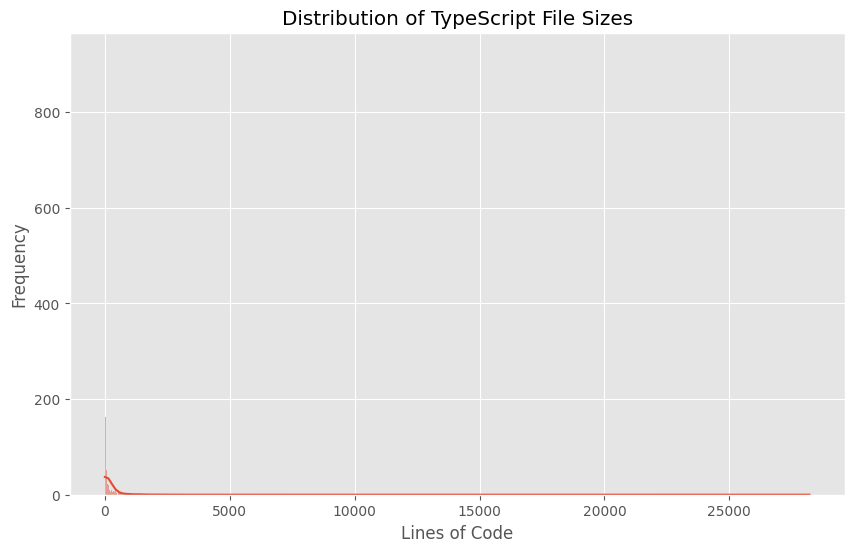

In [6]:
# Generate statistics for the codebase
stats = analyzer.generate_stats()

# Display overview statistics
print(f"Total TypeScript files: {stats['total_files']}")
print(f"Total lines of code: {stats['total_lines']}")
print(f"Average lines per file: {stats['avg_lines_per_file']:.2f}")

# Create a DataFrame for the file sizes
file_sizes = pd.DataFrame({
    'file': [str(Path(file).name) for file in stats['file_sizes'].keys()],
    'size': list(stats['file_sizes'].values())
})

# Plot the distribution of file sizes
plt.figure(figsize=(10, 6))
sns.histplot(file_sizes['size'], kde=True)
plt.title('Distribution of TypeScript File Sizes')
plt.xlabel('Lines of Code')
plt.ylabel('Frequency')
plt.show()

## Custom Queries

We can use custom TreeSitter queries to find specific patterns in the code.

In [7]:
# Example: Find all arrow functions
query = """
(arrow_function) @function
"""

arrow_functions = analyzer.custom_query(query)

print(f"Found arrow functions in {len(arrow_functions)} files")

# Count arrow functions per file
arrow_counts = {file_path: len(matches) for file_path, matches in arrow_functions.items()}
total_arrows = sum(arrow_counts.values())
print(f"Total arrow functions found: {total_arrows}")

# Show a sample of arrow functions
for file_path, matches in list(arrow_functions.items())[:2]:
    print(f"\nFile: {file_path}")
    for match in matches[:3]:  # Show only the first 3 matches per file
        print(f"  Line {match['line']}: {match['text'][:50]}..." if len(match['text']) > 50 else f"  Line {match['line']}: {match['text']}")

Error querying /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino-std-serializers/test/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/types/pino-import.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/types/pino.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/transport/core.test.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/transport/core.transpiled.test.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/fixtures/ts/transport-worker.ts: too many values to unpack (expected 2)
Error querying /Users/ral

Error querying /Users/ralph/projects/spellcast/node_modules/secure-json-parse/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/instance.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/hooks.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/serverFactory.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/plugin.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/type-provider.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/fastify.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/

## Visualizing Code Patterns

Let's create some visualizations to better understand the codebase structure.

Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/types/pino-type-only.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/transport/core.transpiled.test.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/fixtures/ts/to-file-transport.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/fixtures/ts/to-file-transport-with-transform.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv-formats/src/formats.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv-formats/src/limit.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv-formats/src/index.ts: too many values to unpack (expected 2)


Error querying /Users/ralph/projects/spellcast/node_modules/thread-stream/test/ts/to-file.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastq/test/example.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/core.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/vocabularies/code.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/vocabularies/dynamic/dynamicAnchor.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/vocabularies/dynamic/dynamicRef.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/vocabularies/core/ref.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ajv/lib/vocabulari

Error querying /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino-std-serializers/test/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/types/pino-import.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/types/pino.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/transport/core.test.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/transport/core.transpiled.test.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/pino/test/fixtures/ts/transport-worker.ts: too many values to unpack (expected 2)
Error querying /Users/ral

Error querying /Users/ralph/projects/spellcast/node_modules/secure-json-parse/types/index.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/instance.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/hooks.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/serverFactory.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/plugin.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/type-provider.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fastify/test/types/fastify.test-d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/

Error querying /Users/ralph/projects/spellcast/node_modules/exponential-backoff/dist/delay/always/always.delay.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/exponential-backoff/dist/delay/skip-first/skip-first.delay.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/jackspeak/dist/esm/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/jackspeak/dist/commonjs/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/smart-buffer/typings/smartbuffer.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/minipass-sized/node_modules/minipass/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/undici-types/pool-stats.d.ts: too many values to unpack (expected 2)


Error querying /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/convert.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/common/function.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/common/date.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/common/math.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/common/common.d.ts

Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Show.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/TheseT.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Map.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/TaskOption.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Tree.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Refinement.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Traversable.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/BoundedDistributiveLattice.d.ts: too many values to unpack (expected 2

Error querying /Users/ralph/projects/spellcast/node_modules/csstype/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/ulidx/dist/types.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fast-json-stringify/types/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/mnemonist/inverted-index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/mnemonist/bk-tree.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/mnemonist/bit-vector.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/mnemonist/fibonacci-heap.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/mnemonist/bloom-filter.d.ts: too many values to unpac

Error querying /Users/ralph/projects/spellcast/node_modules/light-my-request/types/index.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/sumBy.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/first.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/assignWith.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/conformsTo.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/before.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/rearg.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/sortedIndex.d.ts: too many valu

Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Alt.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/IOOption.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/FromEither.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Comonad.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/BooleanAlgebra.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Monad.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/ValidationT.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/es6/Bifunctor.d.ts: too many values to unpack (expected 2)
Error

Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/isArrayBuffer.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/keysIn.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/runInContext.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/map.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/any.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/isEqualWith.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/size.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/@types/lodash/fp/assoc.d.ts

Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/NaturalTransformation.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Reader.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Monoid.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Foldable.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Identity.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Chain.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Choice.d.ts: too many values to unpack (expected 2)
Error querying /Users/ralph/projects/spellcast/node_modules/fp-ts/lib/Invariant.d.ts: too many values to unpack (expected 2)
Err

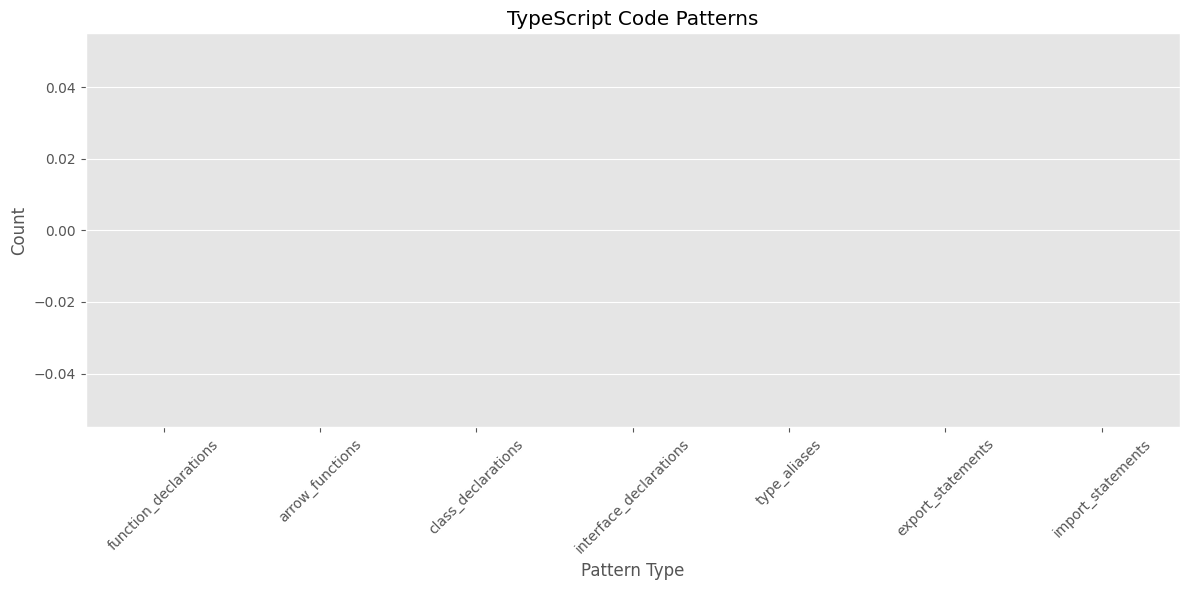

In [8]:
# Analyze different kinds of nodes in the code
node_types = {
    'function_declarations': 0,
    'arrow_functions': 0,
    'class_declarations': 0,
    'interface_declarations': 0,
    'type_aliases': 0,
    'export_statements': 0,
    'import_statements': 0
}

# Custom queries for each node type
queries = {
    'function_declarations': "(function_declaration) @func",
    'arrow_functions': "(arrow_function) @arrow",
    'class_declarations': "(class_declaration) @class",
    'interface_declarations': "(interface_declaration) @interface",
    'type_aliases': "(type_alias_declaration) @type",
    'export_statements': "(export_statement) @export",
    'import_statements': "(import_statement) @import"
}

# Run each query and count occurrences
for node_type, query in queries.items():
    results = analyzer.custom_query(query)
    count = sum(len(matches) for matches in results.values())
    node_types[node_type] = count
    print(f"Found {count} {node_type}")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(node_types.keys()), y=list(node_types.values()))
plt.title('TypeScript Code Patterns')
plt.xlabel('Pattern Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()